nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')

In [166]:
from datetime import datetime

start_time = datetime.now()

print('Excecution started at {}'.format(start_time))

Excecution started at 2021-07-25 17:46:43.891812


In [167]:
import nltk as nltk

import numpy as np
import pandas as pd
from nltk.corpus import inaugural
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
import string

import warnings
warnings.filterwarnings('ignore')

print("Imported the libraries for EDA")

Imported the libraries for EDA


In [168]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

In [169]:
stemmer = SnowballStemmer('english')

In [170]:
roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
kennedy_raw = inaugural.raw('1961-Kennedy.txt')
nixon_raw = inaugural.raw('1973-Nixon.txt')

### Finding number of sentences in the speeches

In [171]:
roosevelt_sentences = inaugural.sents('1941-Roosevelt.txt')
kennedy_sentences = inaugural.sents('1961-Kennedy.txt')
nixon_sentences = inaugural.sents('1973-Nixon.txt')

In [172]:
print("Roosevelt's inaugural speech in 1941 had {} sentences.".format(len(list(roosevelt_sentences))))
print("Kennedy's inaugural speech in 1961 had {} sentences.".format(len(list(kennedy_sentences))))
print("Nixon's inaugural speech in 1973 had {} sentences.".format(len(list(nixon_sentences))))

Roosevelt's inaugural speech in 1941 had 68 sentences.
Kennedy's inaugural speech in 1961 had 52 sentences.
Nixon's inaugural speech in 1973 had 69 sentences.


### Finding number of words in raw form of speeches

In [173]:
roosevelt_words = inaugural.words('1941-Roosevelt.txt')
kennedy_words = inaugural.words('1961-Kennedy.txt')
nixon_words = inaugural.words('1973-Nixon.txt')

In [174]:
print("Roosevelt's inaugural speech in 1941 had {} words.".format(len(list(roosevelt_words))))
print("Kennedy's inaugural speech in 1961 had {} words.".format(len(list(kennedy_words))))
print("Nixon's inaugural speech in 1973 had {} words.".format(len(list(nixon_words))))

Roosevelt's inaugural speech in 1941 had 1536 words.
Kennedy's inaugural speech in 1961 had 1546 words.
Nixon's inaugural speech in 1973 had 2028 words.


### Finding number of characters in raw form of speeches

In [175]:
print("Roosevelt's inaugural speech in 1941 had {} characters.".format(len([char for sentence in roosevelt_sentences for word in sentence for char in word])))
print("Kennedy's inaugural speech in 1961 had {} characters.".format(len([char for sentence in kennedy_sentences for word in sentence for char in word])))
print("Nixon's inaugural speech in 1973 had {} characters.".format(len([char for sentence in nixon_sentences for word in sentence for char in word])))

Roosevelt's inaugural speech in 1941 had 6174 characters.
Kennedy's inaugural speech in 1961 had 6202 characters.
Nixon's inaugural speech in 1973 had 8122 characters.


### A user defined function to tokenize words in the speeches

In [176]:
def usd_tokenizer(text):
    temp_tokens = [word for word in word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token.lower())
    return tokens

In [177]:
roosevelt_tokenized = usd_tokenizer(roosevelt_raw)
kennedy_tokenized = usd_tokenizer(kennedy_raw)
nixon_tokenized = usd_tokenizer(nixon_raw)

### Removing the punctuations

In [178]:
roosevelt_without_punc = [word for word in roosevelt_tokenized if not word in list(string.punctuation)]
kennedy_without_punc = [word for word in kennedy_tokenized if not word in list(string.punctuation)]
nixon_without_punc = [word for word in nixon_tokenized if not word in list(string.punctuation)]

In [179]:
print("Roosevelt's inaugural speech in 1941 had {} distinct words without punctations.".format(len(roosevelt_without_punc)))
print("Kennedy's inaugural speech in 1961 had {} distinct words without punctations".format(len(kennedy_without_punc)))
print("Nixon's inaugural speech in 1973 had {} distinct words without punctations".format(len(nixon_without_punc)))

Roosevelt's inaugural speech in 1941 had 1344 distinct words without punctations.
Kennedy's inaugural speech in 1961 had 1370 distinct words without punctations
Nixon's inaugural speech in 1973 had 1816 distinct words without punctations


### Top 10 words after punctuations were removed

In [180]:
print("Top 10 words in Roosevelt's speech(including stopwords)",'\n',pd.Series(roosevelt_without_punc).value_counts().head(10))
print("Top 10 words in Kennedy's speech(including stopwords)",'\n',pd.Series(kennedy_without_punc).value_counts().head(10))
print("Top 10 words in Nixon's speech(including stopwords)",'\n',pd.Series(nixon_without_punc).value_counts().head(10))

Top 10 words in Roosevelt's speech(including stopwords) 
 the     114
of       81
and      47
to       36
in       35
we       32
a        31
it       28
is       24
that     23
dtype: int64
Top 10 words in Kennedy's speech(including stopwords) 
 the     86
of      65
to      43
and     41
we      30
a       29
in      26
not     23
our     21
that    20
dtype: int64
Top 10 words in Nixon's speech(including stopwords) 
 the     83
of      68
to      65
in      58
and     50
we      47
a       35
that    33
our     32
for     32
dtype: int64


### Removing stopwords from the speeches

In [181]:
roosevelt_without_stopwords = [word for word in roosevelt_without_punc if not word in nltk.corpus.stopwords.words('english')]
kennedy_without_stopwords = [word for word in kennedy_without_punc if not word in nltk.corpus.stopwords.words('english')]
nixon_without_stopwords = [word for word in nixon_without_punc if not word in nltk.corpus.stopwords.words('english')]

### Top 10 words after stopwords were removed

In [182]:
print("Top 10 words in Roosevelt's speech(without stopwords)",'\n',pd.Series(roosevelt_without_stopwords).value_counts().head(10))
print("Top 10 words in Kennedy's speech(without stopwords)",'\n',pd.Series(kennedy_without_stopwords).value_counts().head(10))
print("Top 10 words in Nixon's speech(without stopwords)",'\n',pd.Series(nixon_without_stopwords).value_counts().head(10))

Top 10 words in Roosevelt's speech(without stopwords) 
 nation       12
know         10
life          9
spirit        9
democracy     9
us            8
people        7
america       7
years         6
freedom       6
dtype: int64
Top 10 words in Kennedy's speech(without stopwords) 
 let         16
us          12
world        8
sides        8
new          7
pledge       7
nations      5
citizens     5
shall        5
ask          5
dtype: int64
Top 10 words in Nixon's speech(without stopwords) 
 us                26
let               22
america           21
peace             19
world             18
new               15
's                14
responsibility    11
nation            11
government        10
dtype: int64


### A user defined function to create sentences

In [183]:
def make_sentence(list):
    sentence = ''
    for i, word in enumerate(list):
        sentence = sentence+' '+word
    return sentence.strip()

### Samples sentences using first 20 words after tokenization, removal of punctuations & stopwords

In [184]:
make_sentence(roosevelt_without_stopwords[0:20])

"national day inauguration since people renewed sense dedication united states washington 's day task people create weld together nation lincoln"

In [185]:
make_sentence(kennedy_without_stopwords[0:20])

'vice president johnson mr. speaker mr. chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe'

In [186]:
make_sentence(nixon_without_stopwords[0:20])

'mr. vice president mr. speaker mr. chief justice senator cook mrs. eisenhower fellow citizens great good country share together met'

### A user defined function to create word cloud

In [187]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def usd_wordcloud(list):
    wordcloud = WordCloud(background_color = "white").generate(list)
    plt.figure(figsize=(12,12))
    g = plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return g

### Word clouds

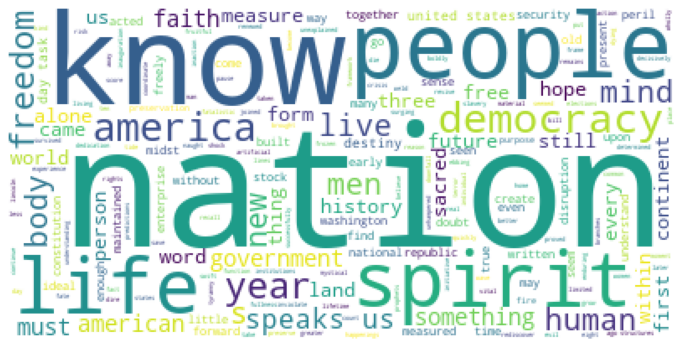

In [188]:
usd_wordcloud(make_sentence(roosevelt_without_stopwords[0:]))

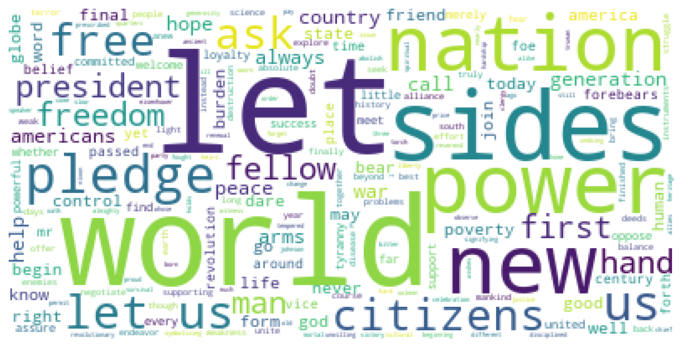

In [189]:
usd_wordcloud(make_sentence(kennedy_without_stopwords[0:]))

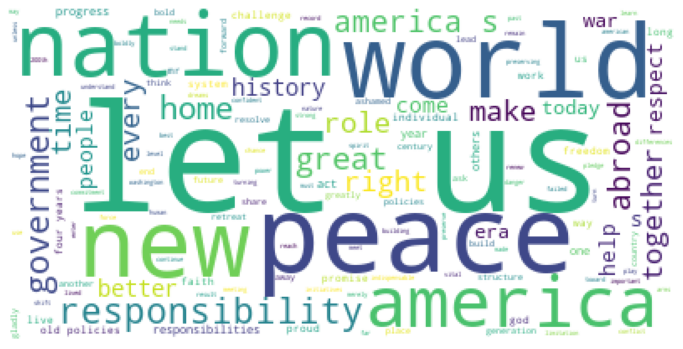

In [190]:
usd_wordcloud(make_sentence(nixon_without_stopwords[0:]))

In [191]:
end_time = datetime.now()

print('Excecution ended at {}'.format(end_time))

print('Total runtime is {}'.format(end_time-start_time))

Excecution ended at 2021-07-25 17:46:47.493192
Total runtime is 0:00:03.601380
